In [1]:
import numpy as np
from skimage import io, data, filters, img_as_ubyte, measure
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import napari

from particle.pipeline import SandHeap

(512, 512)


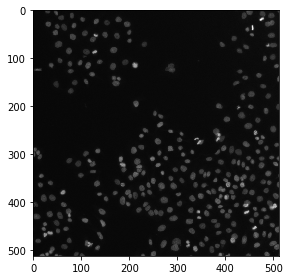

In [2]:
mitosis = data.human_mitosis()
print(mitosis.shape)
io.imshow(mitosis)

# 1. 加载数据

In [3]:
sandHeap = SandHeap(source="./data/liutao/filtered-3cycles.npy",
                   se=ndi.generate_binary_structure(rank=3, connectivity=2), 
                   connectivity=1,
                   persistencePath='./data/liutao/',
                   cubeSize=64)
print(sandHeap.data.shape, sandHeap.data.dtype, sandHeap.status)

Function `_loadData` runs for 0h 0min 0.4s
(500, 1766, 1766) uint8 data-loaded


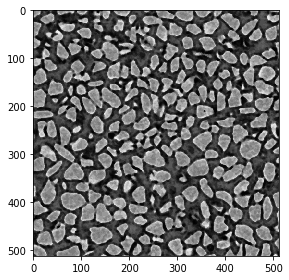

In [4]:
img = sandHeap.data[0][500:1012, 500:1012]
io.imshow(img)

(-0.5, 511.5, 511.5, -0.5)

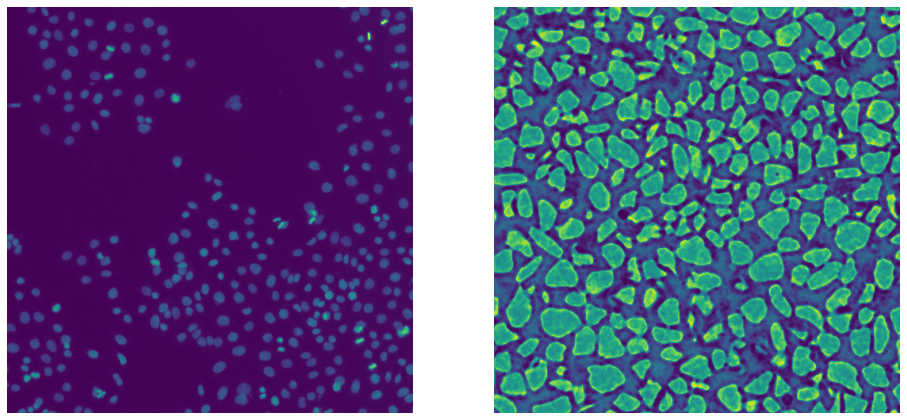

In [5]:
_, ax = plt.subplots(1, 2, figsize=(16, 12))
ax[0].imshow(mitosis);ax[0].axis('off')
ax[1].imshow(img);ax[1].axis('off')

In [6]:
markers = np.load('./data/liutao/markers.npy')
print(markers.max(), markers.shape)

127243 (500, 1766, 1766)


In [7]:
sandHeap._distance = np.load('./data/liutao/distance.npy')
sandHeap.setStatus('distance-calculated')

In [10]:
def markersForWatershed(distance, min_distance=7, connectivity=1, pinch=True):
    from skimage.feature import peak_local_max
    
    coords = peak_local_max(distance, min_distance=min_distance)
    
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers = measure.label(mask, connectivity=connectivity)
    if pinch:  # 压缩内存占用
        markers = markers.astype(np.int32)
    return markers

In [ ]:
%%time
newMarkers = markersForWatershed(sandHeap._distance, min_distance=1, connectivity=1, pinch=True)
print(newMarkers.max(), newMarkers.shape)

In [ ]:
%gui qt
napari.view_image(newMarkers)